In [30]:
#fn="tracescozy.json"
fn="traces3.json"

In [156]:
import json
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
import contextily as cx

In [104]:
#x=json.loads(fn)
f=open(rep+'/'+fn)
x=f.readlines()

In [41]:
rep="/home/patgendre/windows/Users/pmgen/Downloads/My Cozy/Data/io.cozy.timeseries.geojson"
if not os.path.isdir(rep):
			print("Le répertoire "+rep+" n'existe pas.")

In [45]:
f="lkjlkj.json"
f[-4:]

'json'

In [57]:
def featurenumber(f):
    x=open(f).readlines()
    z=len((json.loads(x[0]))['series'][0]['features'])
    return z

In [95]:
for f in os.listdir(rep):
    if f[-4:]!="json":
        continue
    jt=jsontrip(rep+'/'+fn)
    #print(jt['timeline']['type'])
# certains fichiers trips JSON ont 3 features (point de départ, arrivée + linestring) d'autres 5, 7 OU 9...
# dans tous les cas le dernier des 3,5,7,9 feature est aussi un featurecollection, avec un seul objet, une section e-mission (trajet)

In [84]:
fn="ddbf1ddf006b99b6f68fdd3dc6498d53.json"

In [105]:
y=json.loads(x[0])
# le JSON cozy par jour est encapsulé dans une liste à un seul élément

In [187]:
def jsontrip(f):
    x=open(f).readlines()
    y=json.loads(x[0])['series'][0]
    jtrip={}
    jtrip['distance']=y['properties']['distance']
    jtrip['duration']=y['properties']['duration']
    jtrip['start_fmt_time']=y['properties']['start_fmt_time']
    jtrip['end_fmt_time']=y['properties']['end_fmt_time']
    jtrip['trip_id']=y['properties']['raw_trip']['$oid']
    jtrip['points']=[]
    for j in y['features']:
        z={}
        if j['type']=="Feature":
            #point
            if j['properties']['feature_type'][-5:]=='place':
                z['lon']=j['geometry']['coordinates'][0]
                z['lat']=j['geometry']['coordinates'][1]
                z['type']='place'
            elif j['properties']['feature_type'][-4:]=='stop':
                lon1=j['geometry']['coordinates'][0][0]
                lat1=j['geometry']['coordinates'][0][1]
                lon2=j['geometry']['coordinates'][1][0]
                lat2=j['geometry']['coordinates'][1][1]
                z['lon']=0.5*(lon1+lon2)
                z['lat']=0.5*(lat1+lat2)
                z['type']='stop'
                # les stops points ont une entrée et une sortie (donc une extension, qu'on pourrait stocker aussi...)
            if 'enter_fmt_time' in j['properties']:
                z['enter_fmt_time']=j['properties']['enter_fmt_time']
            if 'exit_fmt_time' in j['properties']:
                z['exit_fmt_time']=j['properties']['exit_fmt_time']
            if 'display_name' in j['properties']:
                z['name']=j['properties']['display_name']
            jtrip['points'].append(z)
        elif j['type']=="FeatureCollection":
            jtrip['timeline']={}
            z['type']=j['features'][0]['properties']['feature_type']
            z['positions']=j['features'][0]['geometry']['coordinates']
            z['speeds']=j['features'][0]['properties']['speeds']
            z['distance']=j['features'][0]['properties']['distance']
            z['duration']=j['features'][0]['properties']['duration']
            z['end_fmt_time']=j['features'][0]['properties']['end_fmt_time']
            z['start_fmt_time']=j['features'][0]['properties']['start_fmt_time']
            z['sensed_mode']=j['features'][0]['properties']['sensed_mode']
            jtrip['timeline']=z
            # RESTE A TRAITER LE CAS D'UN TRIP AVEC N SECTIONS
            #linestring
    return jtrip

In [125]:
jsontrip(rep+'/'+fn)

{'distance': 3357.7519274209685,
 'duration': 1831.0321128368378,
 'start_fmt_time': '2021-02-19T11:35:48.967887+01:00',
 'end_fmt_time': '2021-02-19T12:06:20+01:00',
 'points': [{'lon': 5.4958008,
   'lat': 45.031158,
   'type': 'place',
   'enter_fmt_time': '2021-02-19T11:31:50+01:00',
   'exit_fmt_time': '2021-02-19T11:35:48.967887+01:00',
   'name': 'Variante Chateau Julien, Isère'},
  {'lon': 5.5182447,
   'lat': 45.0251873,
   'type': 'place',
   'enter_fmt_time': '2021-02-19T12:06:20+01:00',
   'exit_fmt_time': '2021-02-19T12:09:20+01:00',
   'name': 'Route de Villard-de-Lans au Clos de la Balme, Isère'},
  {'lon': 5.5140085,
   'lat': 45.02326295,
   'type': 'stop',
   'enter_fmt_time': '2021-02-19T11:55:20+01:00',
   'exit_fmt_time': '2021-02-19T11:55:51+01:00'},
  {'lon': 5.51372915,
   'lat': 45.0229506,
   'type': 'stop',
   'enter_fmt_time': '2021-02-19T11:56:21+01:00',
   'exit_fmt_time': '2021-02-19T11:56:51+01:00'},
  {'lon': 5.5174804,
   'lat': 45.0237925,
   'type': 

In [34]:
print(y.keys())
# le JSON cozy par jour contient des métadonnées et un conteneur "series" qui contient les données proprement dites

dict_keys(['_id', '_rev', 'captureDevice', 'cozyMetadata', 'endDate', 'series', 'source', 'startDate'])


In [35]:
print(y['endDate'], y['startDate'], y['captureDevice'])

2021-02-05T17:32:56.689000+01:00 2021-02-05T15:52:21.387416+01:00 Tests agremob patg


In [106]:
z=y['series']

In [37]:
z[0].keys()

dict_keys(['features', 'id', 'properties', 'type'])

In [ ]:
# series contient un trip e-mission (déplacement) et des objets features

In [107]:
z[0]['properties']

{'distance': 3357.7519274209685,
 'duration': 1831.0321128368378,
 'end_fmt_time': '2021-02-19T12:06:20+01:00',
 'end_loc': {'coordinates': [5.5182447, 45.0251873], 'type': 'Point'},
 'end_local_dt': {'day': 19,
  'hour': 12,
  'minute': 6,
  'month': 2,
  'second': 20,
  'timezone': 'Europe/Paris',
  'weekday': 4,
  'year': 2021},
 'end_place': {'$oid': '60305127a6f72c3c2fb48ad0'},
 'end_ts': 1613732780,
 'feature_type': 'trip',
 'raw_trip': {'$oid': '60305119a6f72c3c2fb48807'},
 'source': 'DwellSegmentationTimeFilter',
 'start_fmt_time': '2021-02-19T11:35:48.967887+01:00',
 'start_loc': {'coordinates': [5.4958008, 45.031158], 'type': 'Point'},
 'start_local_dt': {'day': 19,
  'hour': 11,
  'minute': 35,
  'month': 2,
  'second': 48,
  'timezone': 'Europe/Paris',
  'weekday': 4,
  'year': 2021},
 'start_place': {'$oid': '60305126a6f72c3c2fb48acf'},
 'start_ts': 1613730948.9678872}

In [119]:
z[0]['features'][3]

{'geometry': {'coordinates': [[5.5137914, 45.0230316],
   [5.5136669, 45.0228696]],
  'type': 'LineString'},
 'id': '6030511ea6f72c3c2fb48937',
 'properties': {'distance': 20.49968755638177,
  'duration': 30,
  'ending_section': {'$oid': '6030511ea6f72c3c2fb48923'},
  'enter_fmt_time': '2021-02-19T11:56:21+01:00',
  'enter_loc': {'coordinates': [5.5137914, 45.0230316], 'type': 'Point'},
  'enter_local_dt': {'day': 19,
   'hour': 11,
   'minute': 56,
   'month': 2,
   'second': 21,
   'timezone': 'Europe/Paris',
   'weekday': 4,
   'year': 2021},
  'enter_ts': 1613732181,
  'exit_fmt_time': '2021-02-19T11:56:51+01:00',
  'exit_loc': {'coordinates': [5.5136669, 45.0228696], 'type': 'Point'},
  'exit_local_dt': {'day': 19,
   'hour': 11,
   'minute': 56,
   'month': 2,
   'second': 51,
   'timezone': 'Europe/Paris',
   'weekday': 4,
   'year': 2021},
  'exit_ts': 1613732211,
  'feature_type': 'stop',
  'source': 'SmoothedHighConfidenceMotion',
  'starting_section': {'$oid': '6030511ea6f72

In [64]:
#z[0]['features'][1]

In [89]:
#z[0]['features'][2]

In [188]:
def aggreg_points(rep):
    # aggregates points of the cozy e-mission tracking data into a geodataframe
    t=[]
    for f in os.listdir(rep):
        if f[-4:]!="json":
            continue
        jt=jsontrip(rep+'/'+f)
        for x in jt['points']:
            t.append(x)
    df = pd.DataFrame(t)
    geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
    df = df.drop(['lon', 'lat'], axis=1)
    return gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
    #print(jt['timeline']['type'])


In [192]:
def aggreg_lines(rep):
    # aggregates points of the cozy e-mission tracking data into a geodataframe
    t=[]
    for f in os.listdir(rep):
        if f[-4:]!="json":
            continue
        jt=jsontrip(rep+'/'+f)
        tl = jt['timeline']
        tl['trip_id']=jt['trip_id']
        tl['geometry']=LineString([(xy[0],xy[1]) for xy in tl['positions']])
        tl.pop('positions')
        tl.pop('speeds')
        t.append(tl)
    df = pd.DataFrame(t)
    return gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=df.geometry)
    #print(jt['timeline']['type'])


In [146]:
points=aggreg_points(rep)

In [193]:
lines=aggreg_lines(rep)

In [173]:
lines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [174]:
lines['L']=[g.length for g in lines.to_crs(epsg=2154).geometry]

In [199]:
len(lines.trip_id.unique())

278

In [181]:
lines['diffrel']=(lines['L'] - lines['distance'])/(0.5*(lines['L'] + lines['distance']))

In [185]:
max(lines['diffrel'])

0.004661161149999635

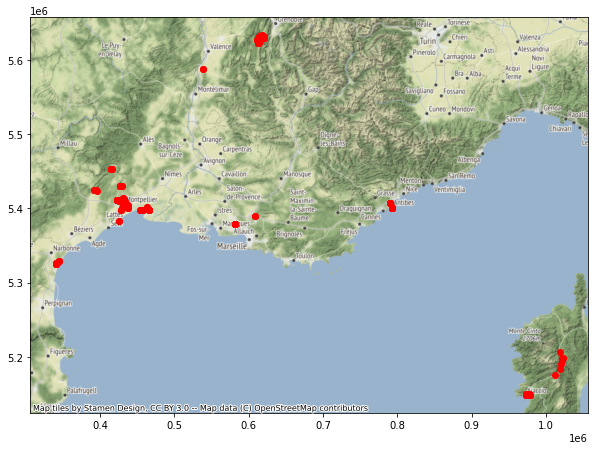

In [155]:
# https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html
ax = points.to_crs(epsg=3857).plot(figsize=(10, 10),color='red')
cx.add_basemap(ax)

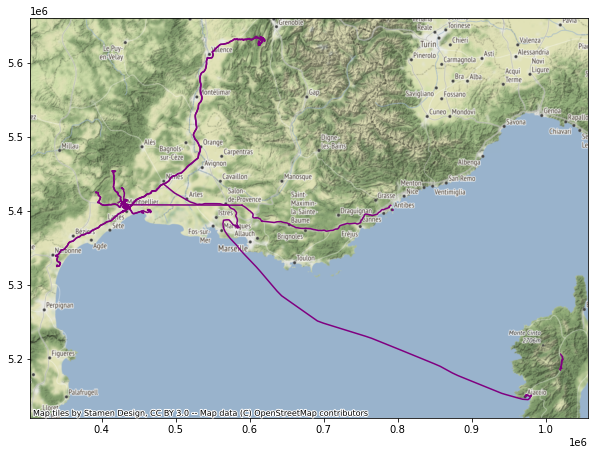

In [169]:
# https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html
ax = lines.to_crs(epsg=3857).plot(figsize=(10, 10),color='purple')
cx.add_basemap(ax)